$$\LARGE{\text{Computational Methods (PH49012),Spring-2022, IIT KGP}}$$<br>$$\large{\text{Bapi Basak}}$$<br>$$\large{\text{Roll:21PH40016}}$$

# Imports

In [1]:
import numpy as np
from numpy import empty,zeros,max
from pylab import imshow,gray,show
from scipy.fft import fft, ifft,fftshift
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from matplotlib import pyplot as plt,font_manager as fm
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')

# Q1).Write a program, to solve the following system: Consider a square shaped box of length 100 cm. Take 100 points along each axis to discretize the domain. Consider two charges at (x,y) = (20 cm, 20 cm) and (80 cm, 80 cm) with $q_1$ = 1 and $q_2$ = −1 respectively. work in units where $\epsilon_0$ = 1 and continue the iteration until your solution for the electric potential changes by less than $10^{-5}$ V per step at every grid point.

Wait a moment.It will take around 3 min 23 sec
Iteration it takes to converge= 6189


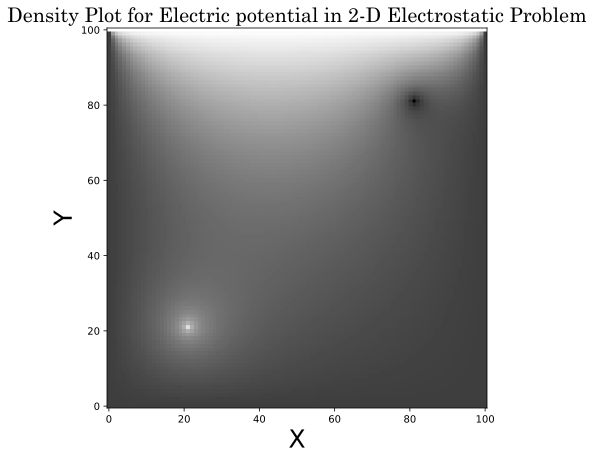

In [2]:
#Constants
M=100   # Grid squares on a side
V=1.0   # Voltage on the top of the wall
target=10**(-5)  # Target Accuracy

#Create Arrays to hold potential values,
phi=zeros([M+1,M+1],float)
phi[M,:]=V
phiprime=empty([M+1,M+1],float)

#Create Arrays to hold charge density values,
rho=zeros([M+1,M+1],float)
rho[21,21]=1
rho[81,81]=-1


print("Wait a moment.It will take around 3 min 23 sec")

delta=1.0
k=0  # to keep track on number of iterartion needed to converge

# Main loop
while delta>target:
    # Calculate new values of potential
    for i in range(M+1):
        for j in range(M+1):
            if i==0 or i==M or j==0 or j==M:
                phiprime[i,j]=phi[i,j]
            else:
                phiprime[i,j]=((phi[i+1,j]+phi[i-1,j]+phi[i,j+1]+phi[i,j-1])/4)+(1/4)*rho[i,j]
    # Calculate maximum difference from old values
    delta=max(abs(phi-phiprime))
    # Swap the two arrays around
    phi,phiprime=phiprime,phi
    k+=1
    
print("Iteration it takes to converge=",k)

# Make a plot
plt.figure(figsize = (7,7))
plt.imshow(phi)
ax = plt.gca()
ax.invert_yaxis()
plt.xlabel('X',size='25')
plt.ylabel('Y',size='25')
plt.title("Density Plot for Electric potential in 2-D Electrostatic Problem",fontname='Century Schoolbook',size='20')

gray()
show()

# Q2).Consider a triangular function for x ∈ [−2, 2]. find its derivative using spectral method and compare your results with other methods. Plot the triangular function and it’s derivative.

$$
 f(x) =
  \begin{cases} 
      \hfill 1-|x|    \hfill & \text{ if $-1 \le x \le 1$} \\
      \hfill 0 \hfill & \text{otherwise} \\
  \end{cases}
$$

Text(0, 0.5, 'f or $\\frac{df}{dx}$')

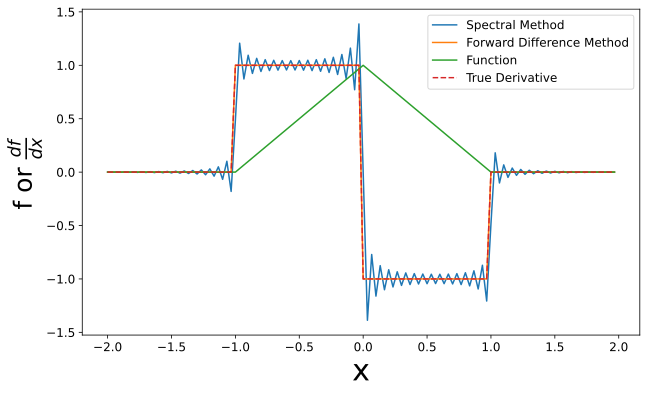

In [4]:
plt.rcParams['figure.figsize']=[10,6]
plt.rcParams.update({'font.size':12})  #Setting Figure size and font size of label

n=120   # Number of Grid Points
L=4     # Domain Length
dx=L/n  #Spacing

x=np.arange(-L/2,L/2,dx,dtype='complex_') # Discretizing x axis

# Defining Function
def f(x):
    if x>=-1 and x<=1:
        ret=1-abs(x)
    else:
        ret=0
    return ret

# Derivative using Forward Difference method
def forward_diff(f,x):
    return (f(x+dx)-f(x))/dx

# Defining True Derivative
def True_Derivative(x):
    if x>0 and x<1:
        return -1
    if x<0 and x>-1:
        return 1
    else:
        return 0

y = [f(xx) for xx in x]  #Function Value at corresponding x value
y1=[forward_diff(f,xx) for xx in x]  # Derivative Value at corresponding x value using forward difference
y2=[True_Derivative(xx) for xx in x]  # True Derivative Value at corresponding x value

#Spectral Derivative Method
fhat=np.fft.fft(y)  #Transforming to Fourier Space
kappa=(2*np.pi/L)*np.arange(-n/2,n/2)  #Transforming x to k space
kappa=np.fft.fftshift(kappa)    #Reordering FFT Frequencies
dfhat=kappa*fhat*(1j)
dfFFT=np.real(np.fft.ifft(dfhat))  #Back to real space

# Make Plot
plt.plot(x,dfFFT.real,label="Spectral Method")
plt.plot(x,y1,label="Forward Difference Method")
plt.plot(x,y,label="Function")
plt.plot(x,y2,'--',label="True Derivative")
plt.legend()
plt.xlabel("x",size='30')
plt.ylabel(r'f or $\frac{df}{dx}$',size='25')

The cases where the function is discontinuous, and has sharp turning points,this results in situations where the spectral derivative becomes in accurate.This is known as the Gibbs phenomenon, which attempts to quantify why does the spectral derivative fail to accurately approximate the derivative at these sharp turning points.